# Diabetes Insight

## EDA

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../diabetes_dataset.csv")

In [3]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [5]:
df.duplicated().sum()

np.int64(0)

There are 100k rows and 31 columns in total. It is evident that there are no missing or duplicate values. The data was synthetically generated, and the source claims it is clean. Likewise, the source confirms that the data realistically matches real-life population health patterns, and that the target variable consists of 20-25% positives, making it balanced for classification. That said, it is worth inspecting and analyzing this data nonetheless.

In [6]:
df.describe()

age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.000000       6.000000             7.000000   
75%                            160.000000       7.200000             7.700000   
max                            833.000000      10.000000            10.000000   

       screen_time_hours_per_day  family_history_diabetes  \
count              100000.000000            100000.000000   
mean                    5.996468                 0.219410   
std                     2.468406                 0.413849   
min                     0.500000                 0.000000   
25%                     4.300000                 0.000000   
50%                     6.000000                 0.000000   
75%                     7.700000                 0.000000   
max                    16.800000                 1.000000   

       hypertension_history  cardiovascular_history            bmi  ...  \
count         100000.000000           100000.000000  100000.000000  ...   
mean               0.250800                0.079200      25.612653  ...   
std                0.433476                0.270052       3.586705  ...   
min                0.000000                0.000000      15.000000  ...   
25%                0.000000                0.000000      23.200000  ...   
50%                0.000000                0.000000      25.600000  ...   
75%                1.000000                0.000000      28.000000  ...   
max                1.000000                1.000000      39.200000  ...   

       cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  \
count      100000.000000    100000.000000    100000.000000  100000.000000   
mean          185.978110        54.042790       103.000430     121.462650   
std            32.013005        10.267374        33.390256      43.372619   
min           100.000000        20.000000        50.000000      30.000000   
25%           164.000000        47.000000        78.000000      91.000000   
50%           186.000000        54.000000       102.000000     121.000000   
75%           208.000000        61.000000       126.000000     151.000000   
max           318.000000        98.000000       263.000000     344.000000   

       glucose_fasting  glucose_postprandial  insulin_level          hba1c  \
count     100000.00000         100000.000000  100000.000000  100000.000000   
mean         111.11712            160.035050       9.061242       6.520776   
std           13.59561             30.935472       4.954060       0.813921   
min           60.00000             70.000000       2.000000       4.000000   
25%          102.00000            139.000000       5.090000       5.970000   
50%          111.00000            160.000000       8.790000       6.520000   
75%          120.00000            181.000000      12.450000       7.070000   
max          172.00000            287.000000      32.220000       9.800000   

       diabetes_risk_score  diagnosed_diabetes  
count        100000.000000       100000.000000  
mean             30.222362            0.599980  
std               9.061505            

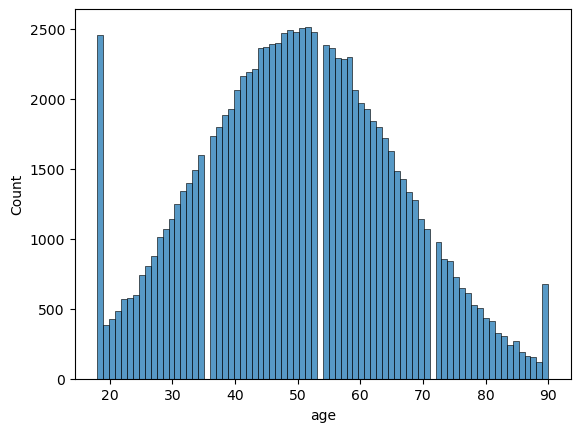

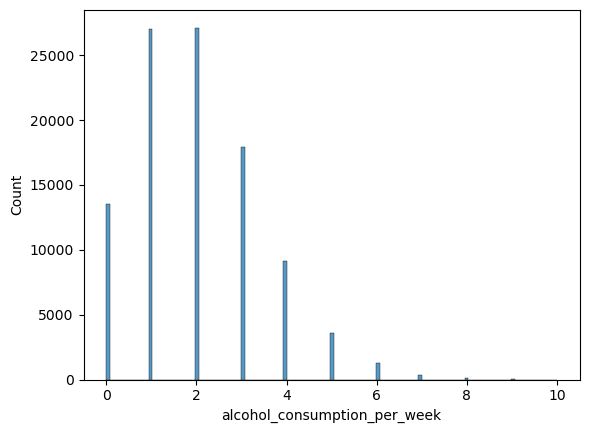

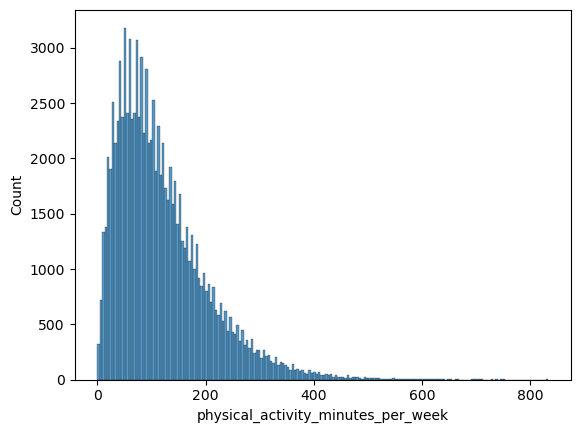

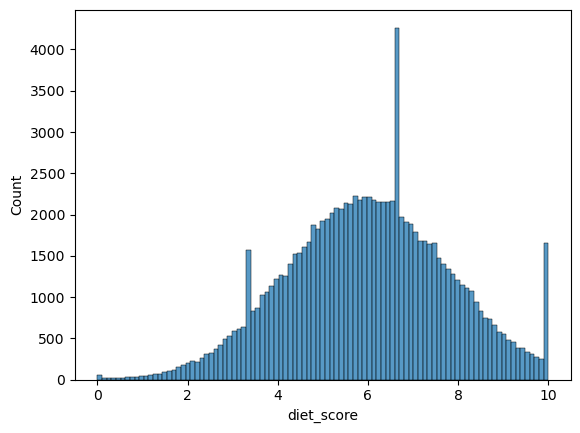

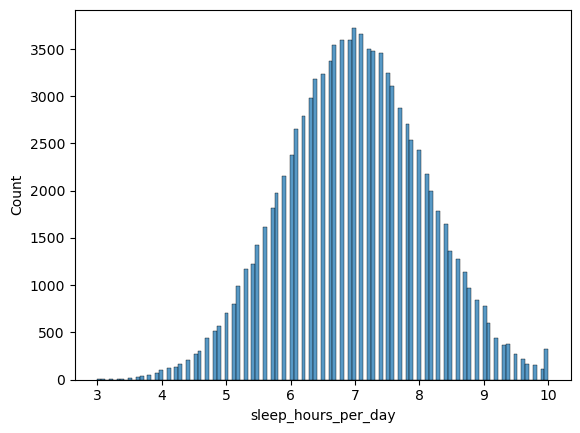

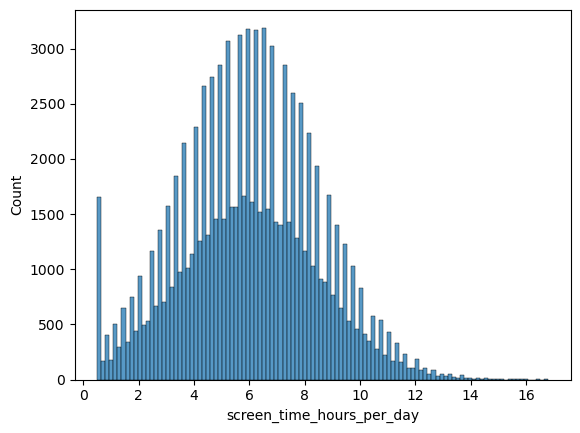

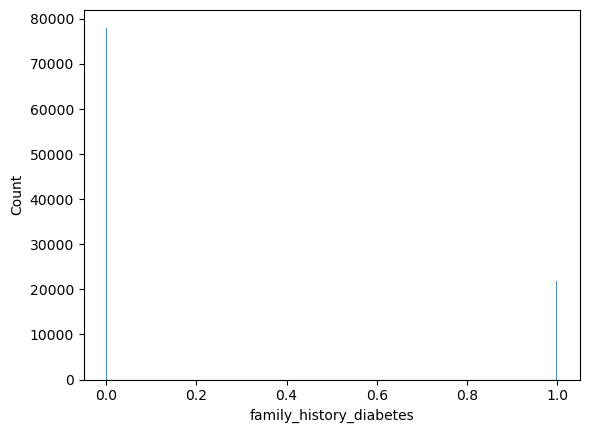

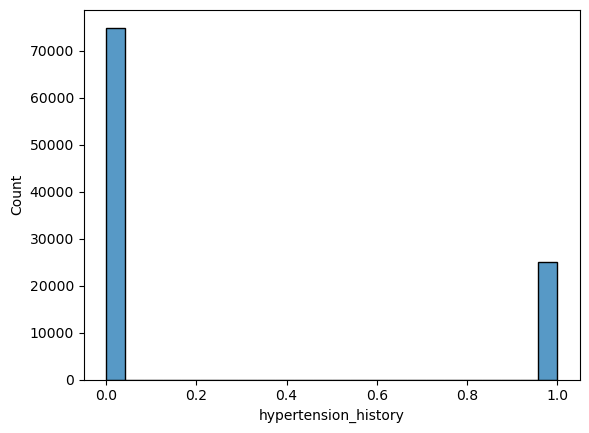

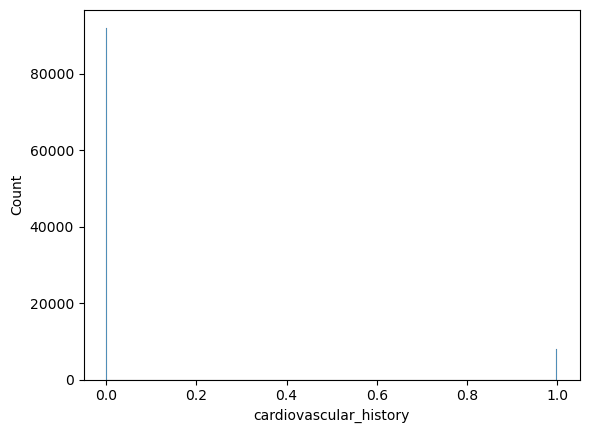

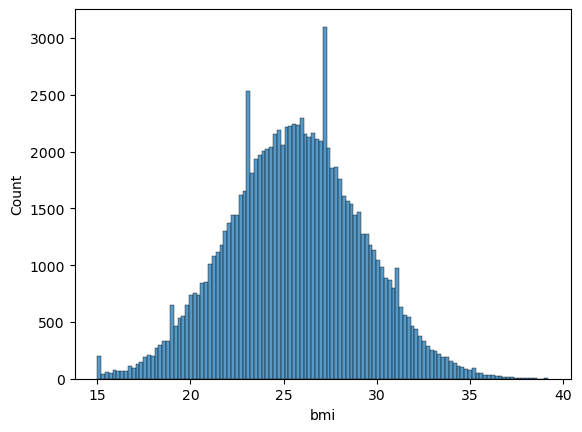

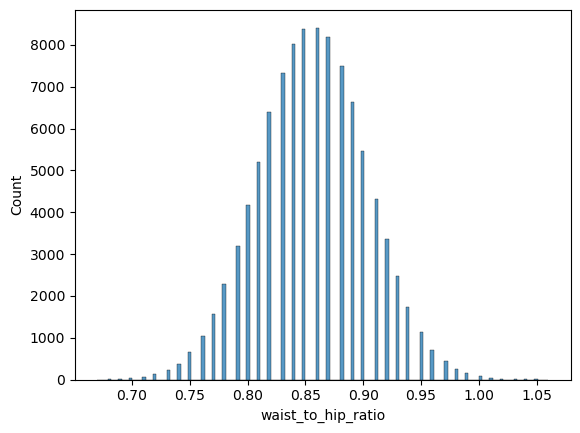

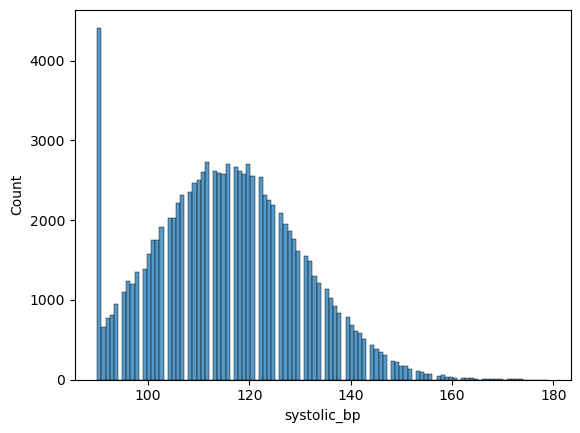

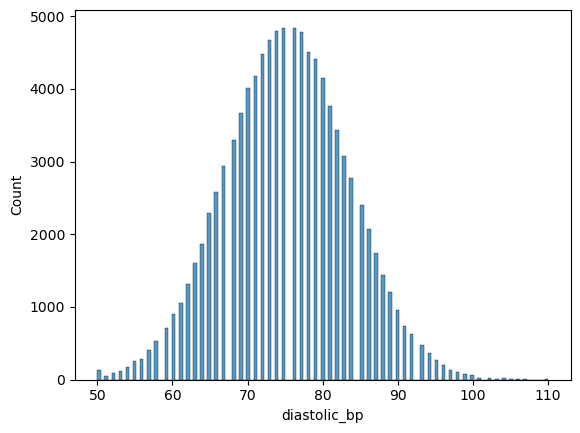

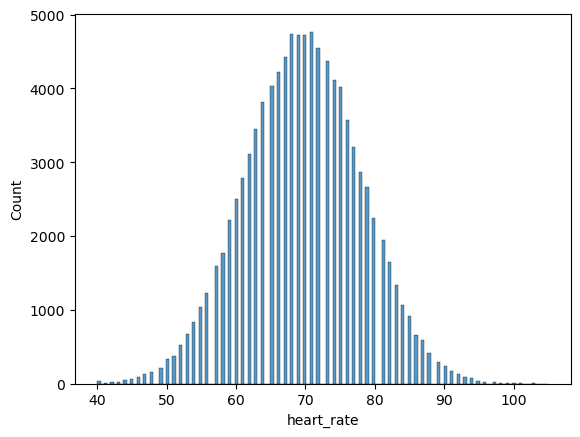

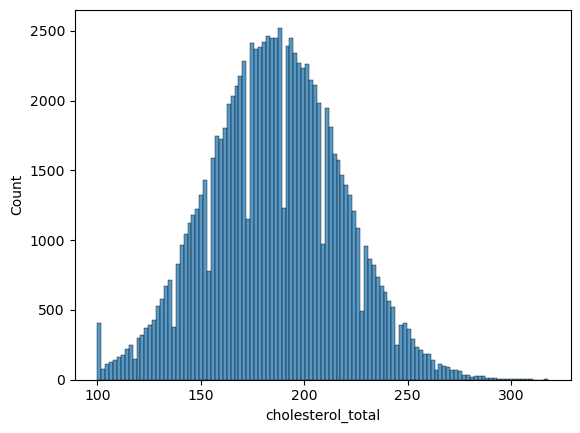

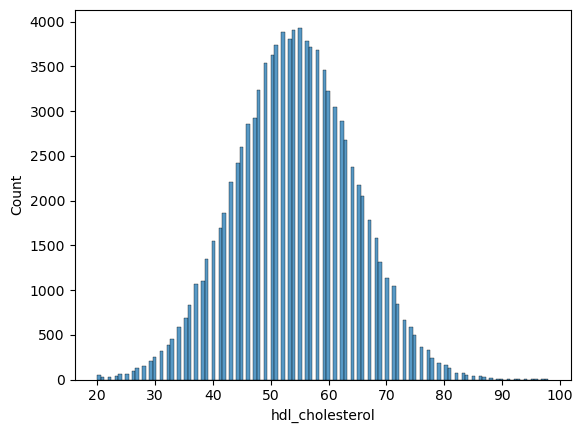

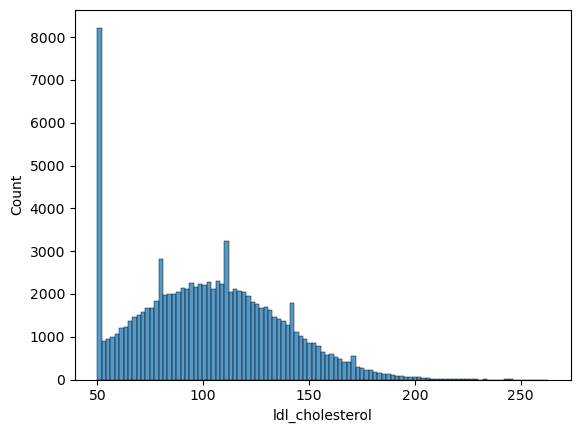

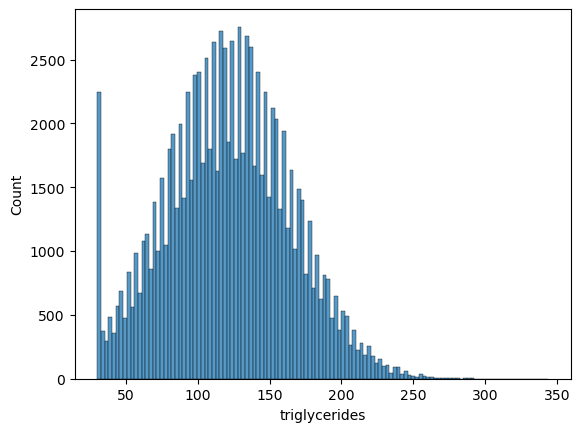

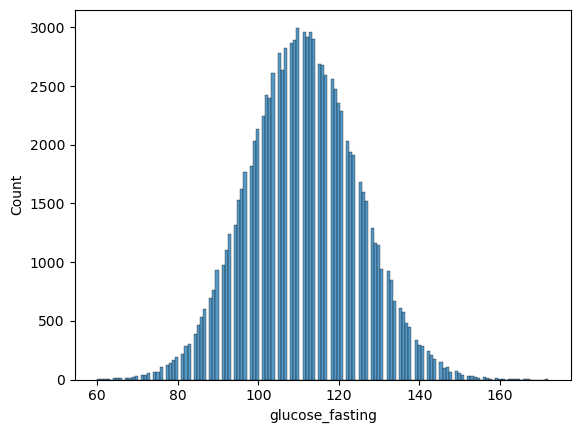

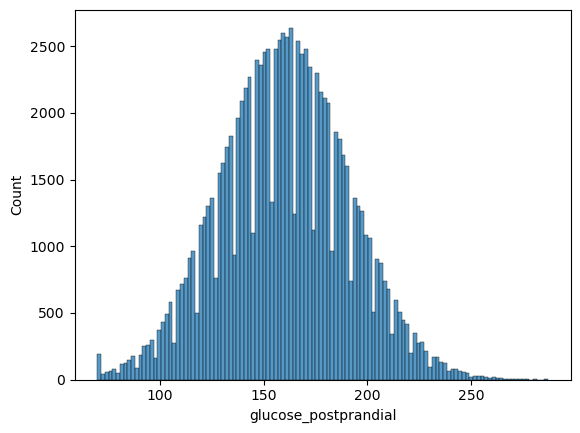

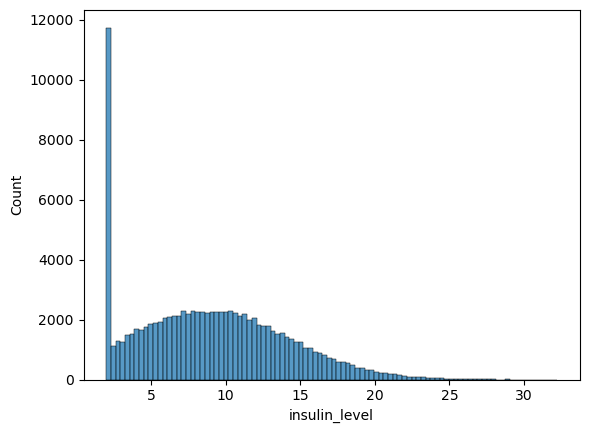

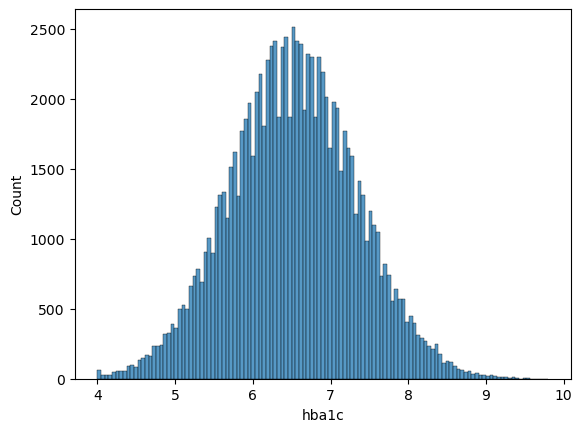

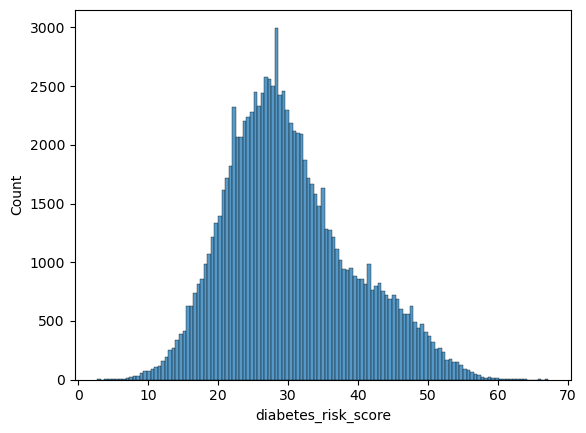

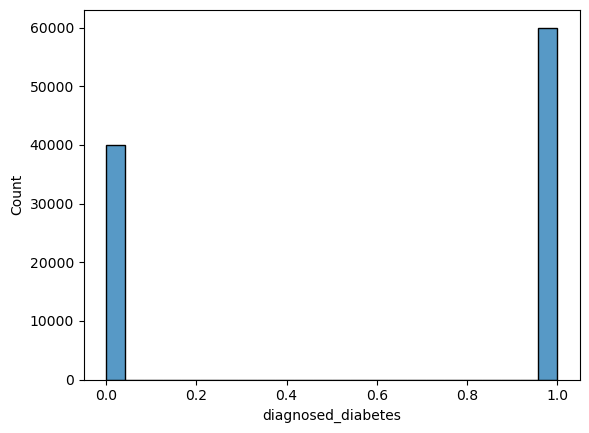

In [7]:
for col in df.select_dtypes("number").columns:
    sns.histplot(df[col])
    plt.show()

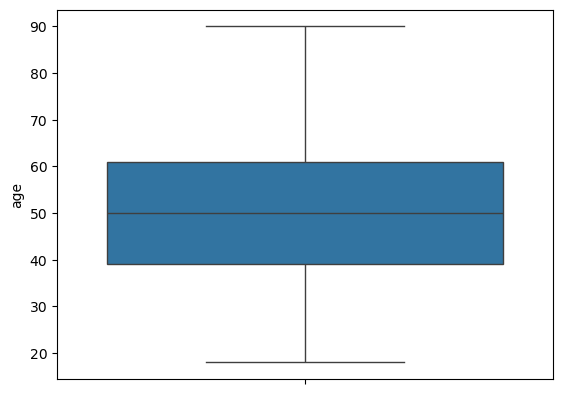

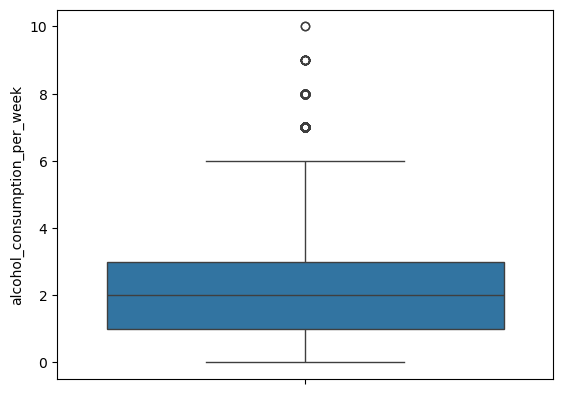

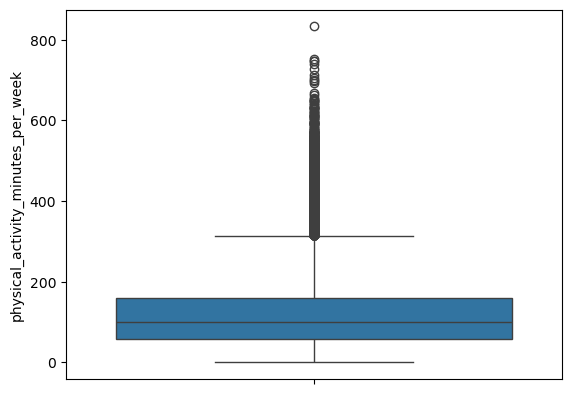

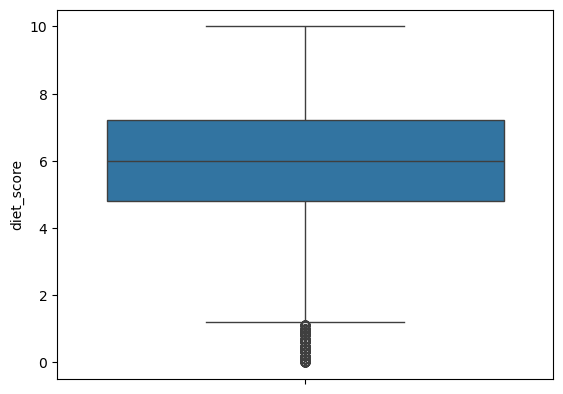

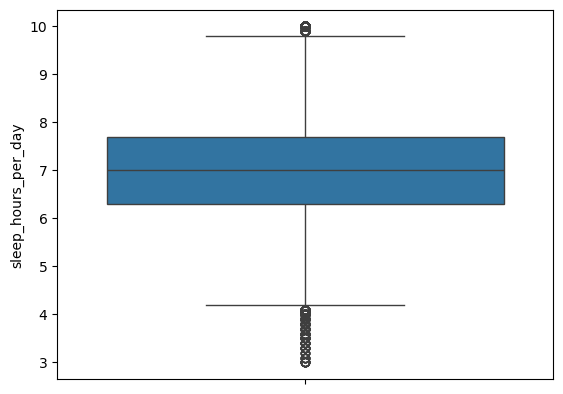

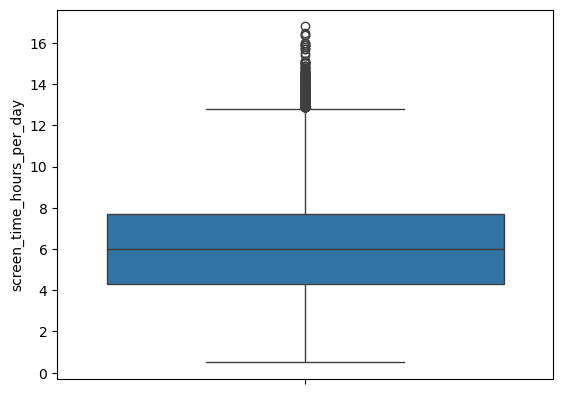

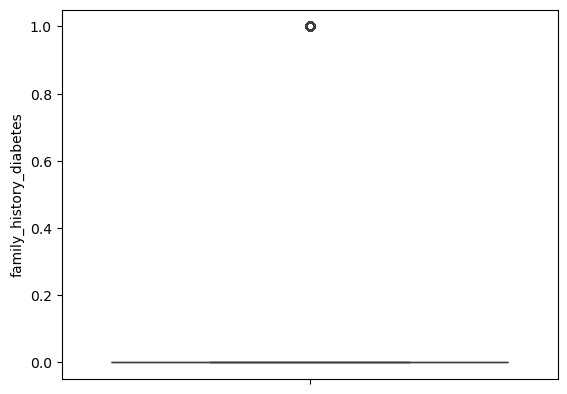

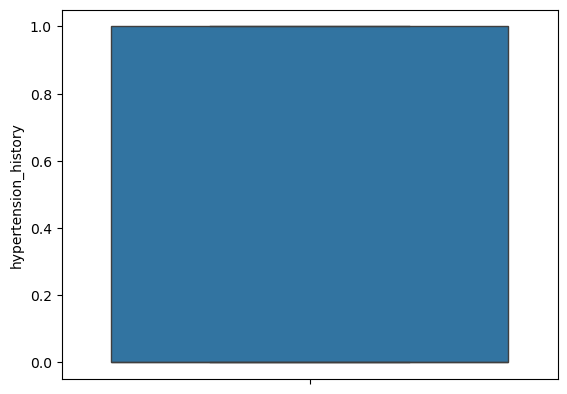

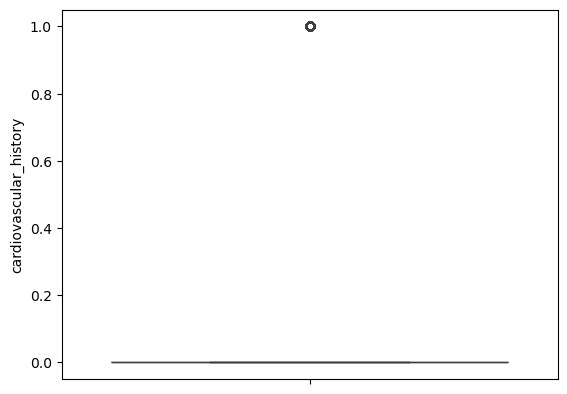

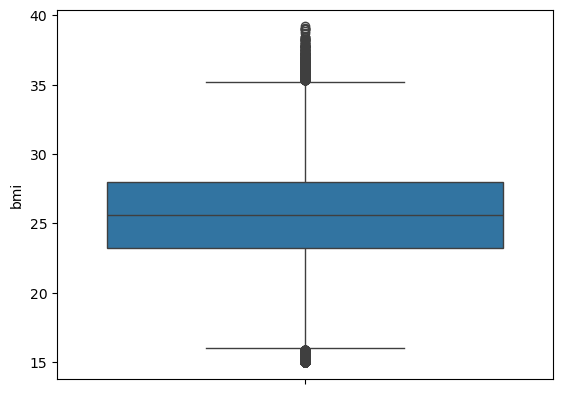

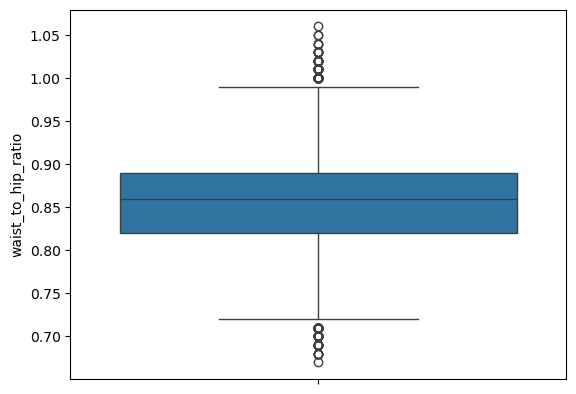

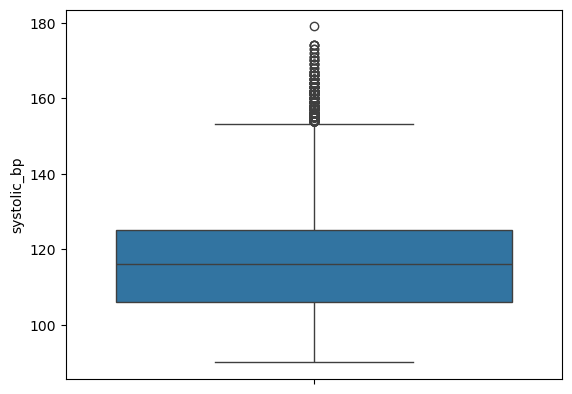

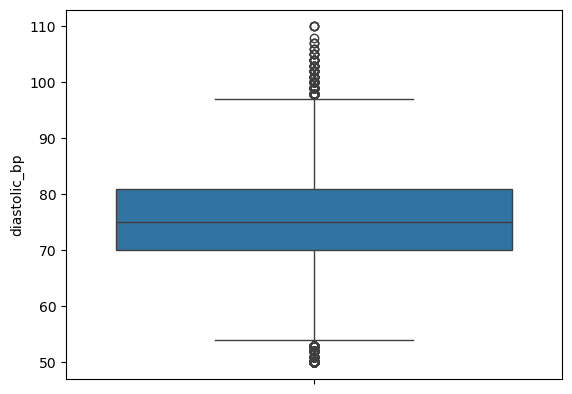

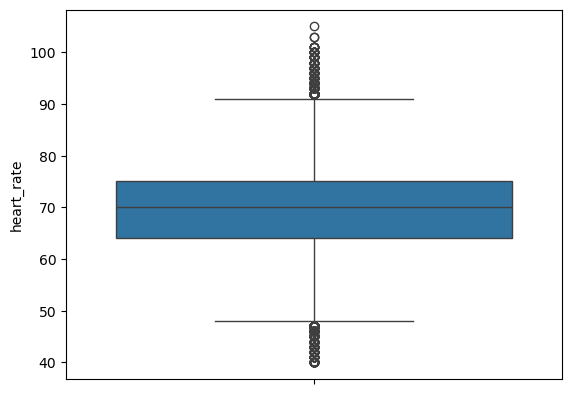

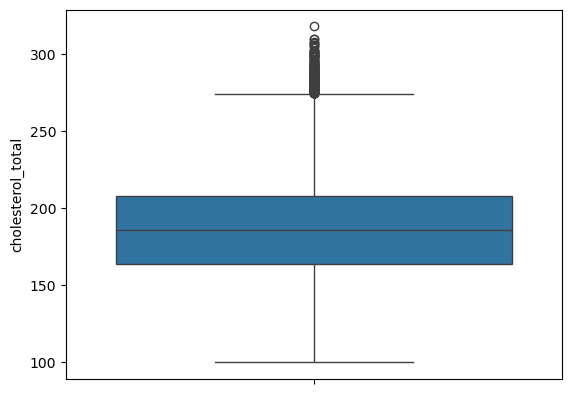

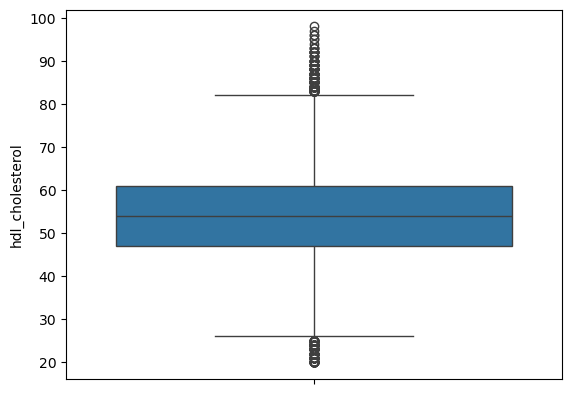

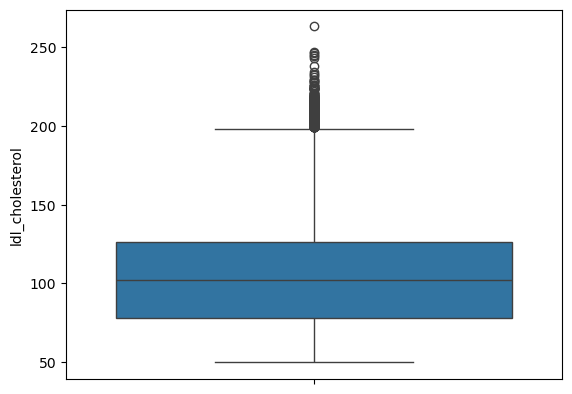

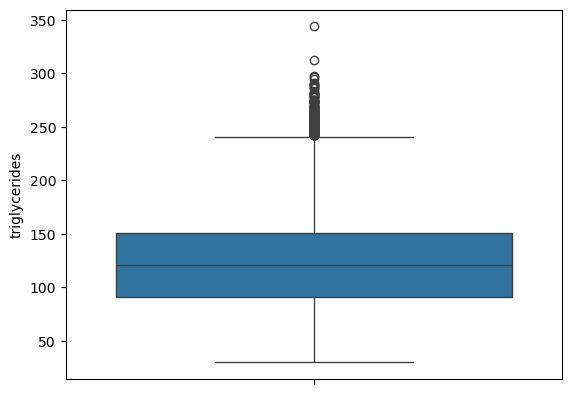

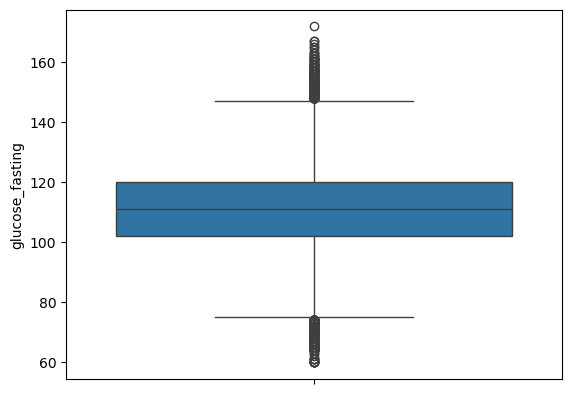

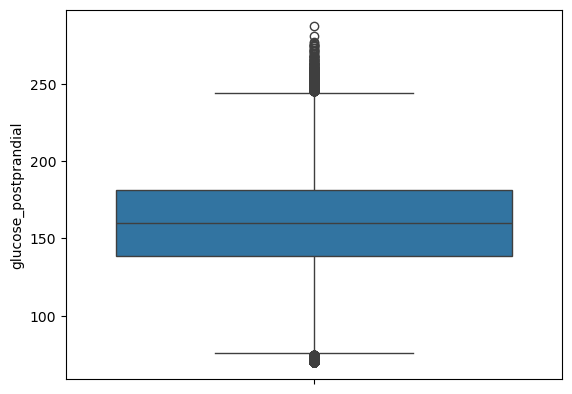

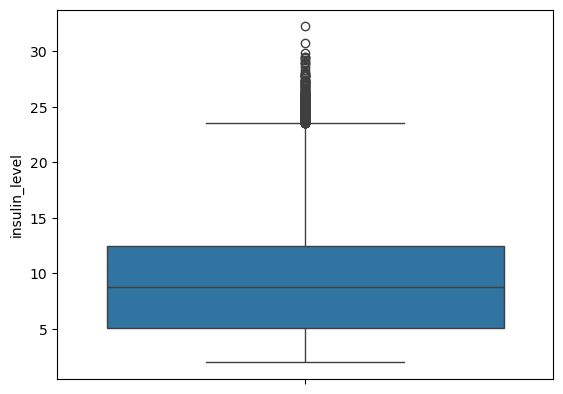

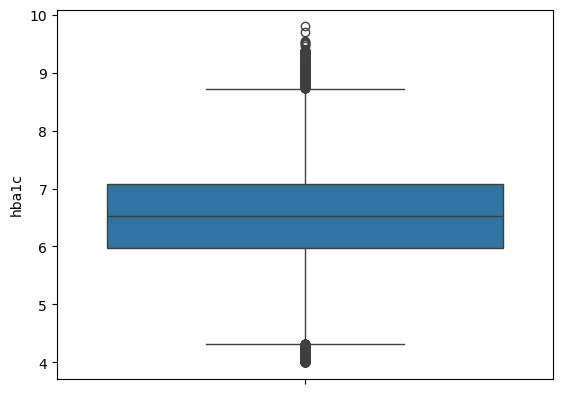

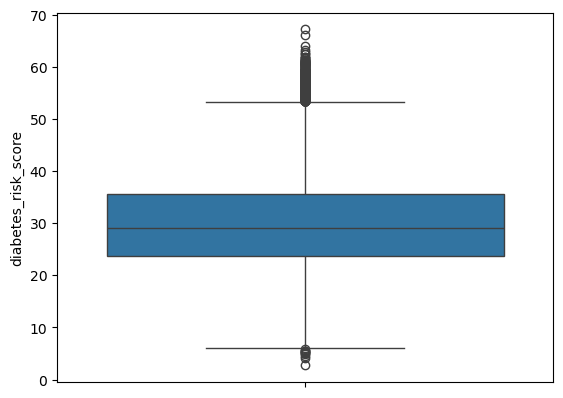

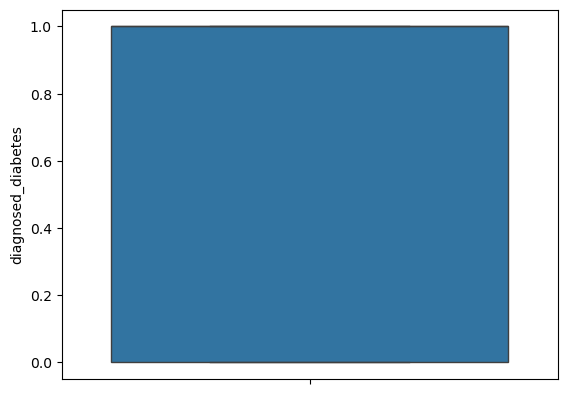

In [8]:
for col in df.select_dtypes("number").columns:
    sns.boxplot(df[col])
    plt.show()

The age seems to be normally distributed, although there is an unusual amount of 18 year olds and 90 year olds in the dataset. Perhaps 18 represents everyone from 0 to 18, while 90 denotes everyone aged 90+. Furthermore, three gaps in the age column can be observed, which calls for further inspection.

In [9]:
df["age"].nunique()

73

There should be 90 - 18 + 1 = 73 age groups, and indeed there are. To confirm that the age data is clean, we can take a look at minimum and maximum values of the age column, which should equal 18 and 90 respectively.

In [10]:
min(df["age"]), max(df["age"])

(18, 90)

Indeed, the age columns seems to be clean. Transformations may be considered later on, given that the values 18 and 90 likely represent a range of different ages, rather than a single one.

The alcohol_consumption_per_week column is right skewed. It has some outliers that are worth checking.

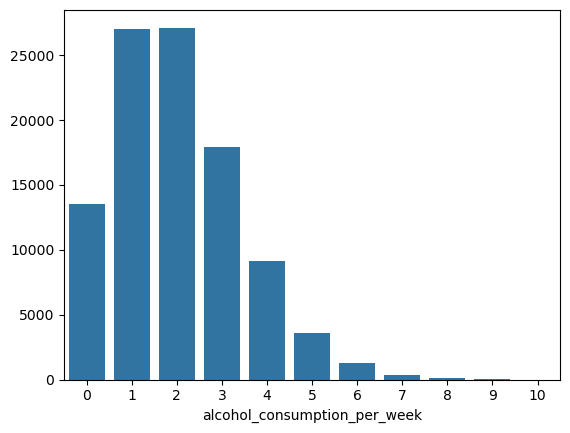

In [11]:
sns.barplot(x=df["alcohol_consumption_per_week"].value_counts().sort_index().index, y=df["alcohol_consumption_per_week"].value_counts().sort_index().values);

In [12]:
df["alcohol_consumption_per_week"].value_counts()

alcohol_consumption_per_week
2     27119
1     26995
3     17896
0     13535
4      9128
5      3605
6      1264
7       356
8        87
9        13
10        2
Name: count, dtype: int64

It can be observed that most people drink 0 to 4 alcoholic beverages per week on average, but a minority drinks more than that. Given that only 2 out of 100k individuals seem to drink 2 alcoholic drinks per week, we can assume that those are exact numbers, unlike the 18 and 90 figures in age. These outliers will be left in the dataset, since they are probably relevant. Logarithmic transformation may be appropriate.

The physical_activity_minutes_per_week columns is severely right skewed, with many outliers.

In [13]:
df["physical_activity_minutes_per_week"].sort_values(ascending=False).head(10)

48810    833
86287    751
47510    748
90474    747
92767    739
65052    728
93479    712
88146    705
41261    701
74298    697
Name: physical_activity_minutes_per_week, dtype: int64

Removing the individuals who report getting over 700 minutes of weekly exercise will not be done for now. Many professional endurance athletes, such as cyclists, exercise 20 hours per week, which would equal 1200 minutes. It is entirely plausible that the outliers in this dataset pertain to such individuals. Logarithmic transformation may be appropriate.

The diet score columns may have some values with an oddly high number of instances. It also has some outliers and appears to be moderately skewed.

In [14]:
df["diet_score"].value_counts().sort_values(ascending=False).head(10)

diet_score
5.7    2219
5.9    2217
6.0    2207
6.1    2179
5.8    2178
6.5    2166
6.4    2154
6.2    2153
6.7    2153
6.3    2149
Name: count, dtype: int64

In [15]:
df["diet_score"].value_counts().sort_values().head(10)

diet_score
0.1    15
0.4    15
0.5    16
0.2    17
0.3    17
0.6    25
0.7    26
0.9    33
0.8    36
1.0    44
Name: count, dtype: int64

In [16]:
df["diet_score"].unique()

array([ 5.7,  6.7,  6.4,  3.4,  7.2,  9. ,  9.2,  4.1,  8.2,  7.5,  7. ,
        6.6,  5.3,  5.4,  8.6,  4.8,  6. ,  8.8,  6.2,  3.7,  9.8,  4.5,
        3.3,  5.2,  5.9,  8.7,  8.4,  0.8,  7.4,  8.1,  5.6,  5.5, 10. ,
        4.3,  4.6,  8.3,  1.5,  6.1,  3.8,  7.1,  9.6,  7.9,  5.8,  1.3,
        7.8,  7.7,  6.8,  5. ,  9.4,  6.5,  4.7,  7.6,  4.4,  8. ,  4. ,
        3.6,  3.9,  6.9,  8.9,  6.3,  2.9,  5.1,  7.3,  2.3,  9.3,  1.4,
        2.7,  2.6,  8.5,  9.9,  9.1,  9.7,  4.9,  3. ,  3.1,  3.2,  3.5,
        4.2,  2.2,  2.4,  0. ,  2.5,  2.8,  0.2,  9.5,  2. ,  1.9,  1.7,
        0.9,  2.1,  1.2,  1.6,  1.8,  0.7,  1.1,  0.3,  0.4,  1. ,  0.1,
        0.6,  0.5])

In [17]:
df.loc[df["diet_score"].isin([9.7, 9.8, 9.9, 10]), "diet_score"].value_counts().sort_values(ascending=False)

diet_score
10.0    1440
9.7      279
9.8      252
9.9      215
Name: count, dtype: int64

The number 10 has an oddly high number of instances. Given that this dataset is synthetic, we may consider adjusting it both here and in some of the other columns that have a similar issue.

The sleep_hours_per_day column appears to be slightly left skewed. Furthermore, it looks like there may be a lot of instances of 10.

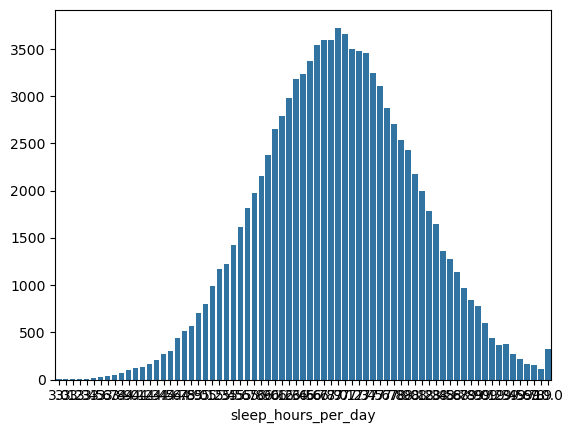

In [18]:
sns.barplot(x=df["sleep_hours_per_day"].value_counts().index, y=df["sleep_hours_per_day"].value_counts().values);

In [19]:
df["sleep_hours_per_day"].nunique()

71

In [20]:
df["sleep_hours_per_day"].unique()

array([ 7.9,  6.5, 10. ,  6.6,  7.4,  6.2,  7.8,  9. ,  8.5,  5.3,  5.2,
        6.9,  6.8,  9.2,  5.7,  6.3,  7.2,  7.6,  9.3,  7.1,  4.5,  5.6,
        7. ,  8. ,  4.9,  5.5,  5.1,  5.8,  5.9,  8.6,  6.1,  8.2,  7.3,
        7.7,  7.5,  8.4,  5. ,  8.8,  6.4,  8.1,  6. ,  5.4,  4.6,  4.7,
        9.4,  4.2,  8.9,  6.7,  8.7,  9.1,  8.3,  9.9,  4.8,  4.3,  4.1,
        9.5,  9.7,  4. ,  3.2,  9.6,  3.4,  4.4,  9.8,  3.7,  3.9,  3.6,
        3.8,  3.3,  3. ,  3.5,  3.1])

In [21]:
df.loc[df["sleep_hours_per_day"].isin([3, 3.1, 3.3, 9.7, 9.8, 10]), "sleep_hours_per_day"].value_counts().sort_values(ascending=False)

sleep_hours_per_day
10.0    323
9.7     167
9.8     151
3.0      11
3.3      10
3.1       6
Name: count, dtype: int64

Indeed, the unusually high prevalence of individuals sleeping 10h a day indicates that the number possibly includes those who sleep more than that as well, but it may just be a byproduct of the synthetic nature of this dataset. This will be dealt with later on.

The screen_time_hours_per_day also seems to have a right skew. Let us explore it further.

In [22]:
df["screen_time_hours_per_day"].nunique()

156

In [23]:
df["screen_time_hours_per_day"].value_counts().sort_values(ascending=False).head(10)

screen_time_hours_per_day
5.8    1664
6.3    1628
5.9    1618
6.1    1612
6.6    1609
6.5    1582
5.7    1579
5.5    1566
5.4    1565
6.0    1556
Name: count, dtype: int64

In [24]:
np.sort(df["screen_time_hours_per_day"].unique())

array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,
        6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,
        7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,
        8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,
        9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4,
       11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5,
       12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6,
       13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7,
       14.8, 14.9, 15. , 15.1, 15.4, 15.5, 15.7, 15

In [25]:
df.loc[df["screen_time_hours_per_day"].isin([0.5, 0.6, 0.7, 0.8, 0.9, 1]), "screen_time_hours_per_day"].value_counts().sort_values(ascending=False)

screen_time_hours_per_day
0.5    1511
0.9     218
0.8     185
1.0     180
0.7     171
0.6     143
Name: count, dtype: int64

This repeating issue is clearly due to the synthetic nature of the dataset. This will not be mentioned hereon anymore. It will likely be resolved with binning.

In [26]:
def identify_oddities(df):
    odd_columns = []
    for col in df.select_dtypes("number").columns:
        if df[col].nunique() < 10:
            continue
        unique_values = np.sort(df[col].unique())
        low0, low1 = unique_values[:2]
        high1, high0 = unique_values[-2:]
        if len(df[df[col] == low0]) > len(df[df[col] == low1]) * 1.5 or len(df[df[col] == high0]) > len(df[df[col] == high1]) * 1.5:
            odd_columns.append(col)
    return odd_columns

In [27]:
identify_oddities(df)

['age',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'glucose_postprandial',
 'insulin_level',
 'hba1c']

These columns will need to be binned. The exact strategy will be determined later on.

Now let us explore the correlations between numeric variables.

In [28]:
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes("number")
    corr = numeric_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, vmax=1, vmin=-1)
    plt.title("Correlation Matrix")
    plt.show()

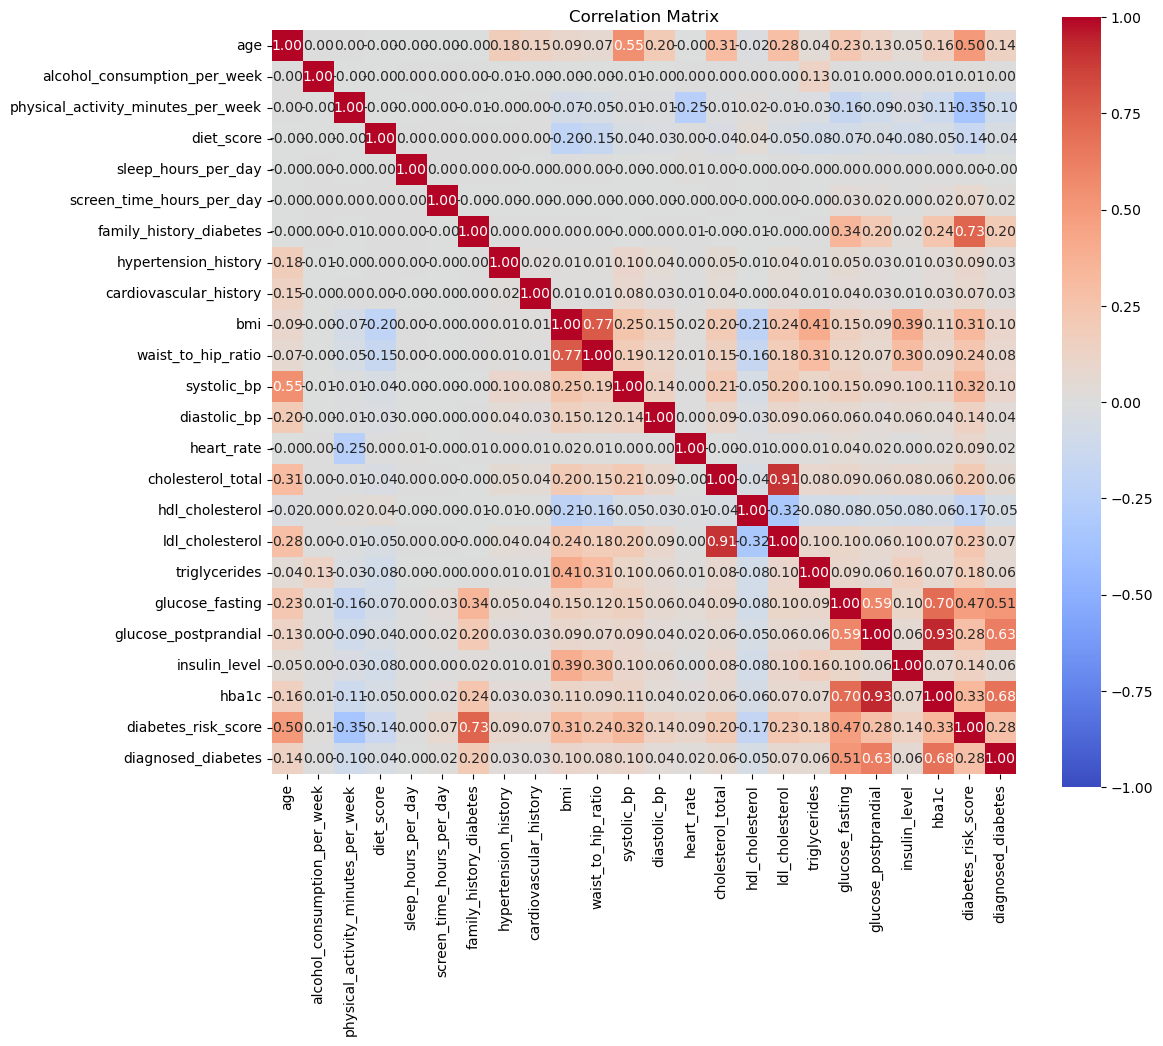

In [29]:
plot_correlation_matrix(df)

High multicollinearity can be observed between cholesterol_total and ldl_cholesterol, as well as glucose_postprandial and hba1c. These will either be combined, or one of them will be dropped. Most variables show low to no correlation with the target variable (diagnosed_diabetes). These will be kept for now. The diabetes_risk_score variable correlates moderately with the target, but it predicts a similar value. Given that this variable shows higher correlation with many variables, compared to diagnosed_diabetes, it can be transformed and used as a target itself.

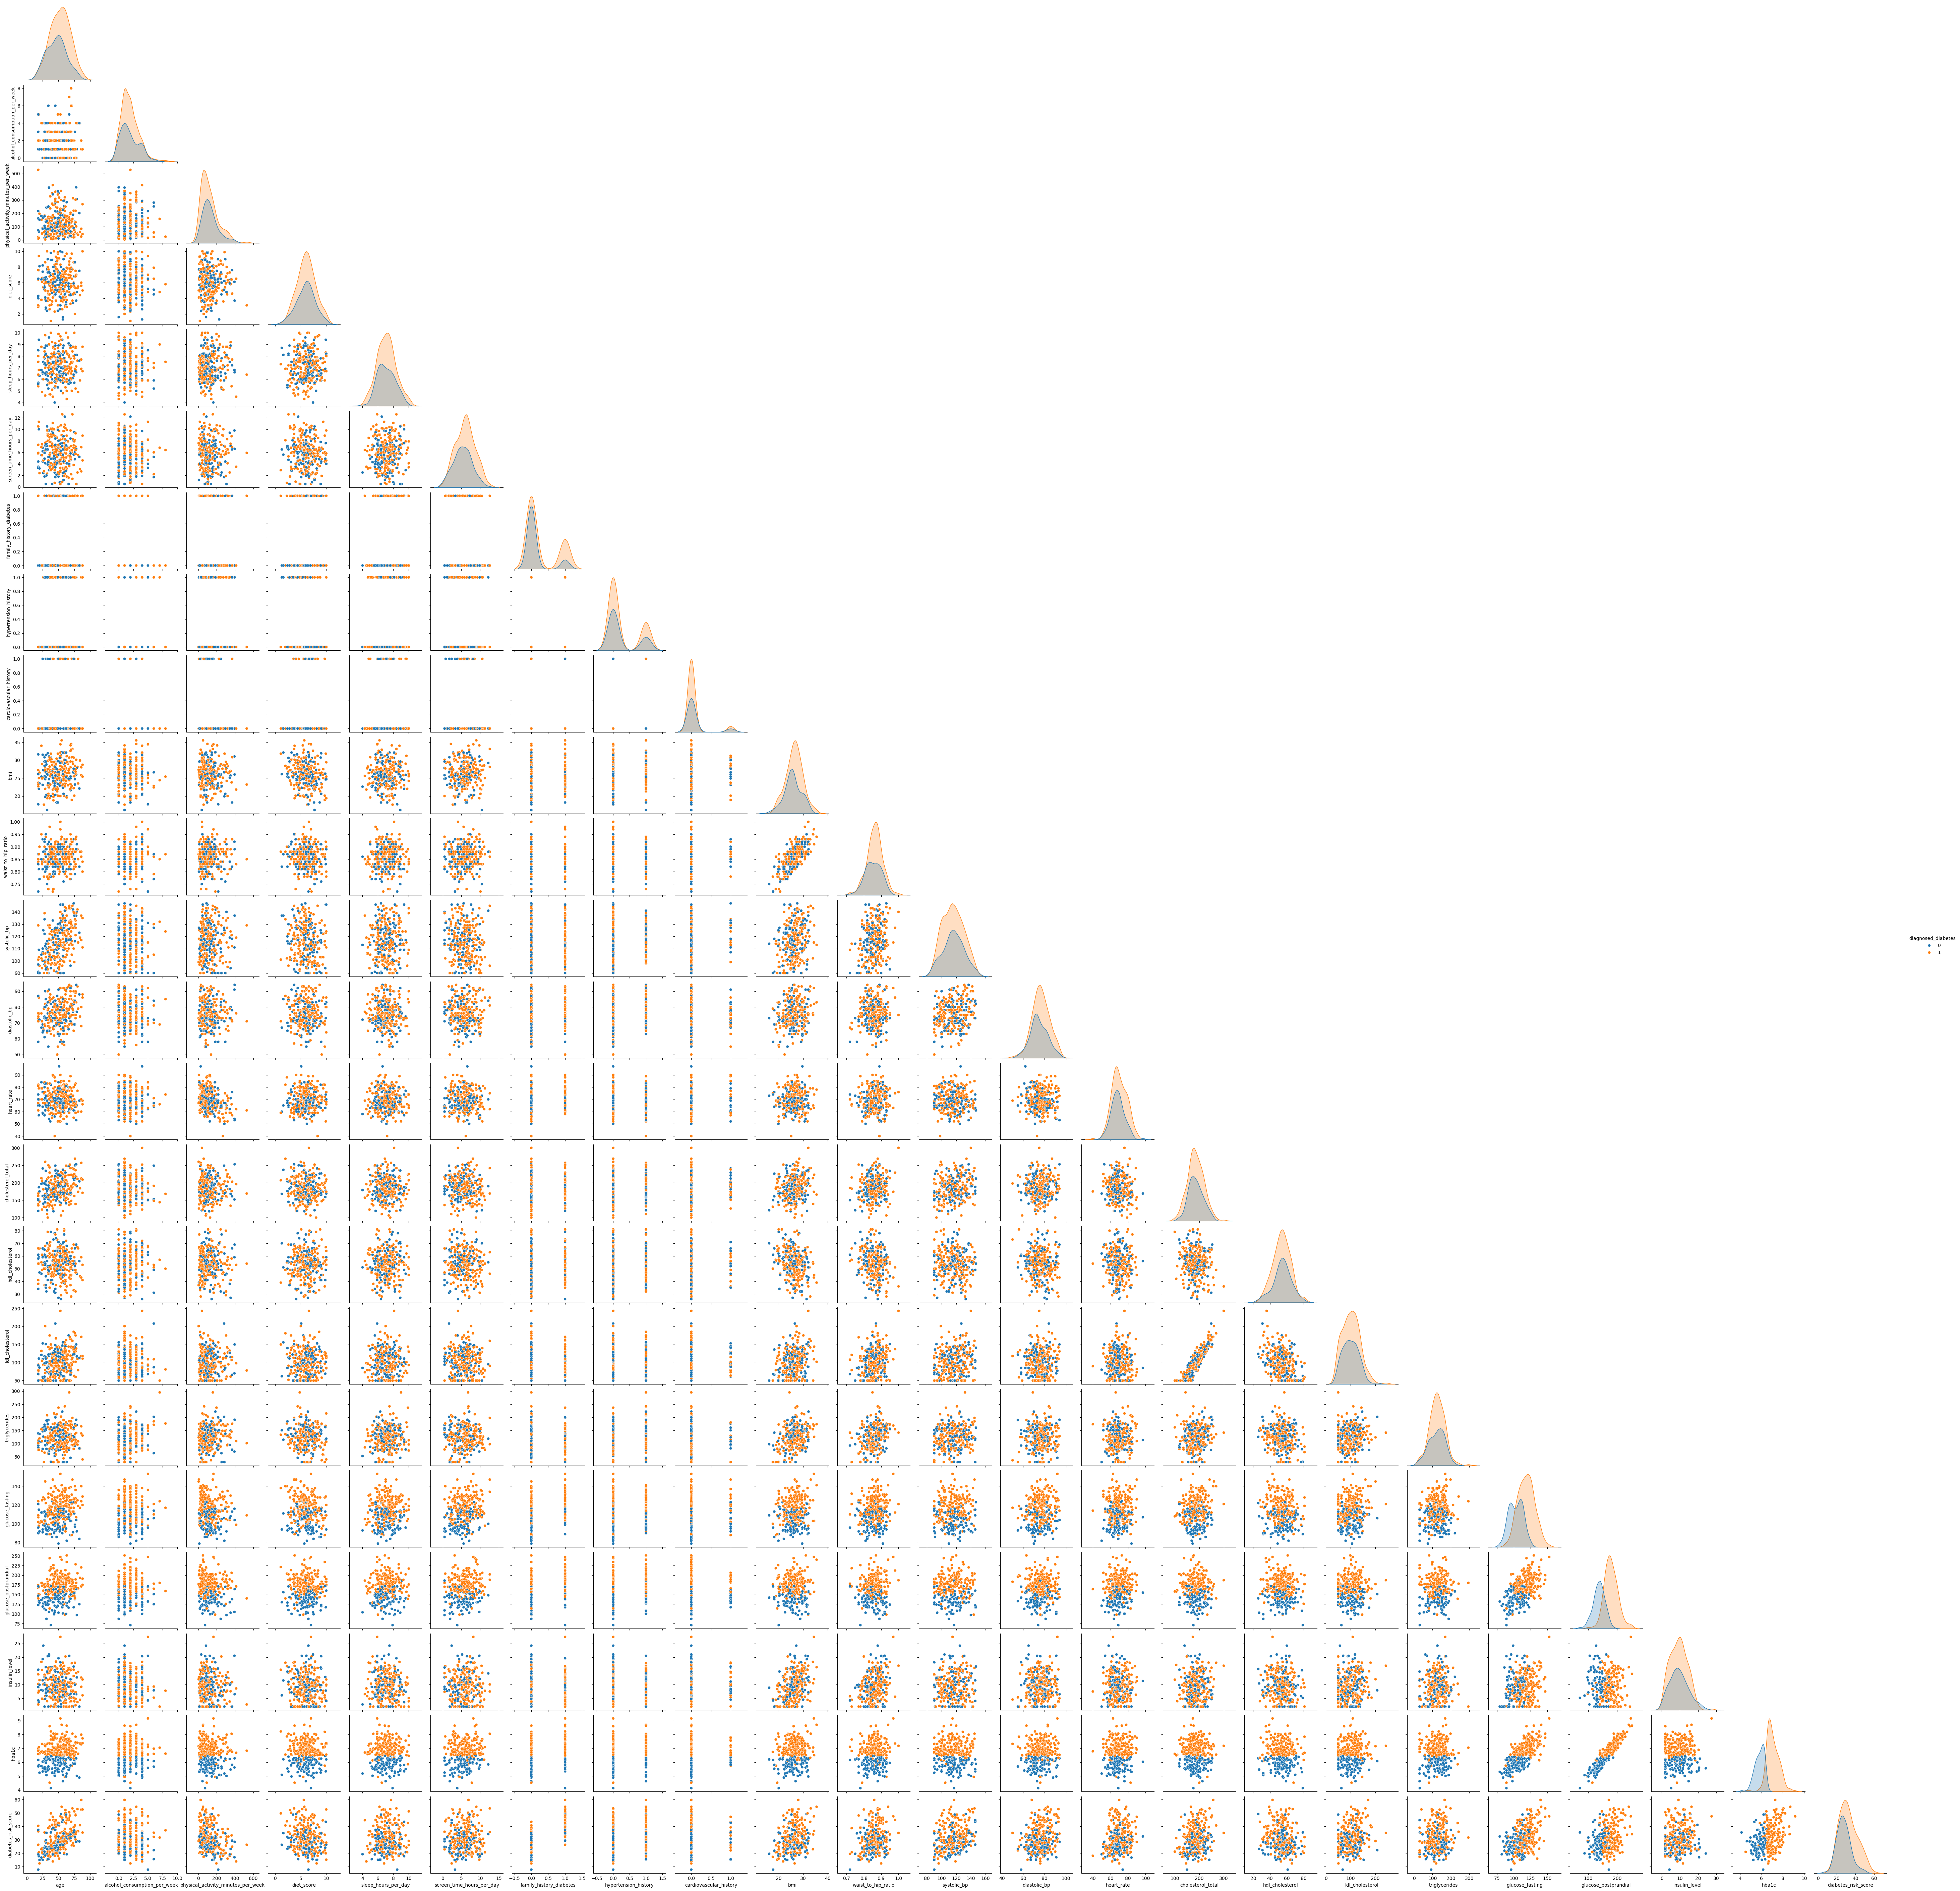

In [30]:
sns.pairplot(df.select_dtypes("number").sample(300), hue="diagnosed_diabetes", diag_kind="kde", corner=True);

Clustering is clear in some of the variable combinations, indicating that feature engineering may improve model performance.

Now let us take a look at the categorical variables.

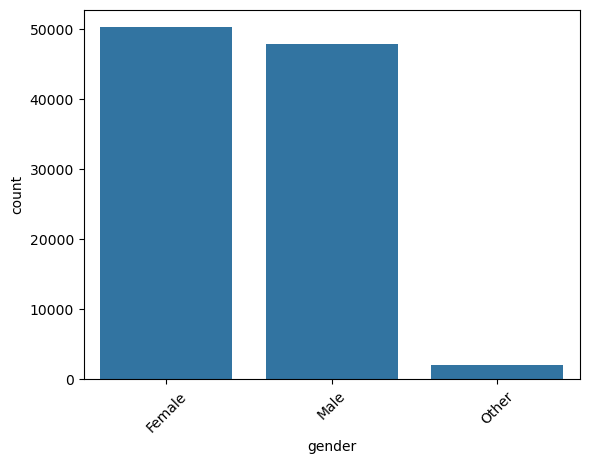

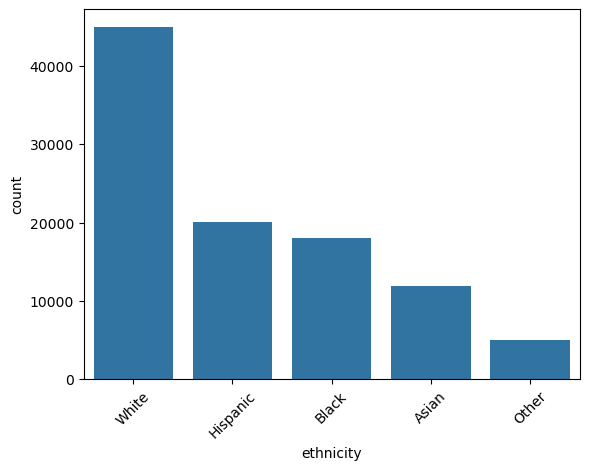

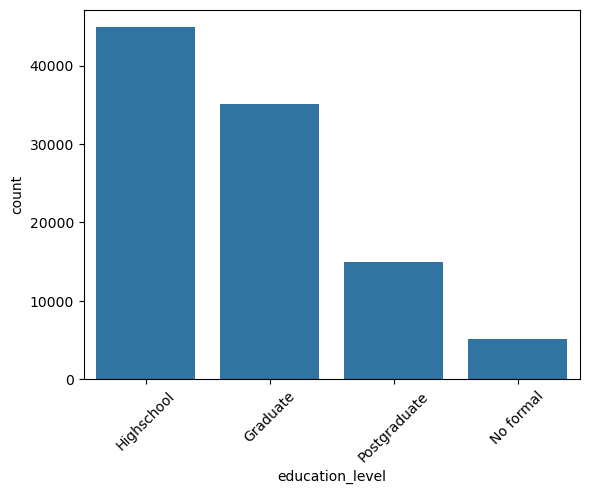

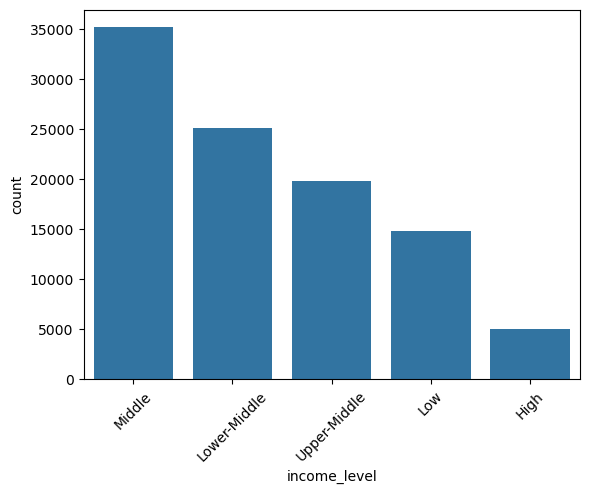

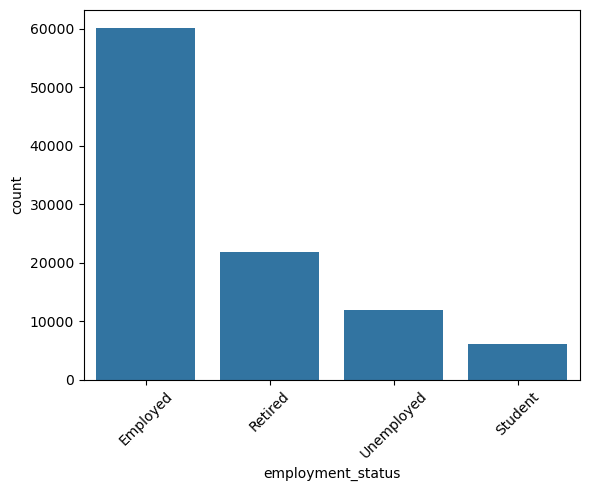

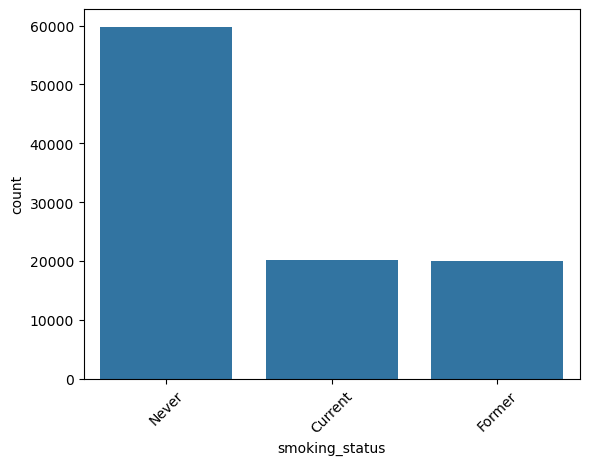

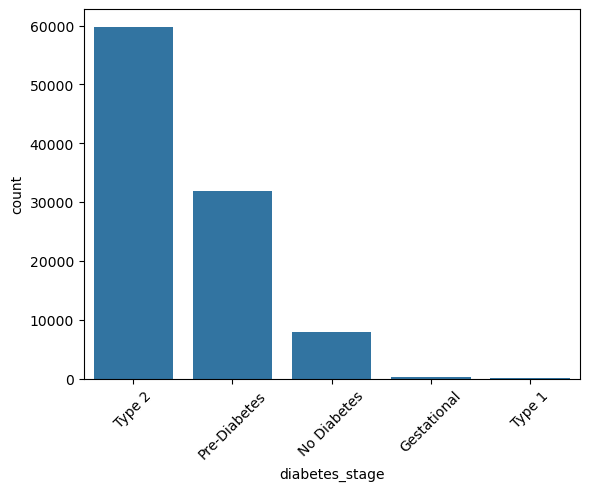

In [31]:
for col in df.select_dtypes("object").columns:
    sns.barplot(df[col].value_counts())
    plt.xticks(rotation=45)
    plt.show()

Most of these seem reasonable and ready for modeling, but there is a chance that there may not be enough instances of "Gestational" and "Type 1" in the diabetes_stage column. This variable likely makes no sense to use, given that the goal of this project. Hypothetically, it could be used as another target, but will likely be dropped for now. Nonetheless, we will take a look at the value counts.

In [32]:
df[df["diabetes_stage"].isin(["Gestational", "Type 1"])]["diabetes_stage"].value_counts()

diabetes_stage
Gestational    278
Type 1         122
Name: count, dtype: int64

While the percentage of these instances is low, there seems to be enough of them. That said, if this variable is used as the target down the line, the data imbalance will be required via methods such as undersampling and oversampling.

Now we will further analyze the categorical variables.

In [33]:
def plot_categorical_analysis(df):
    categorical_cols = df.select_dtypes("object").columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col, hue="diagnosed_diabetes")
        plt.title(f"Distribution of {col} by Diagnosed Diabetes")
        plt.xticks(rotation=45)
        plt.show()

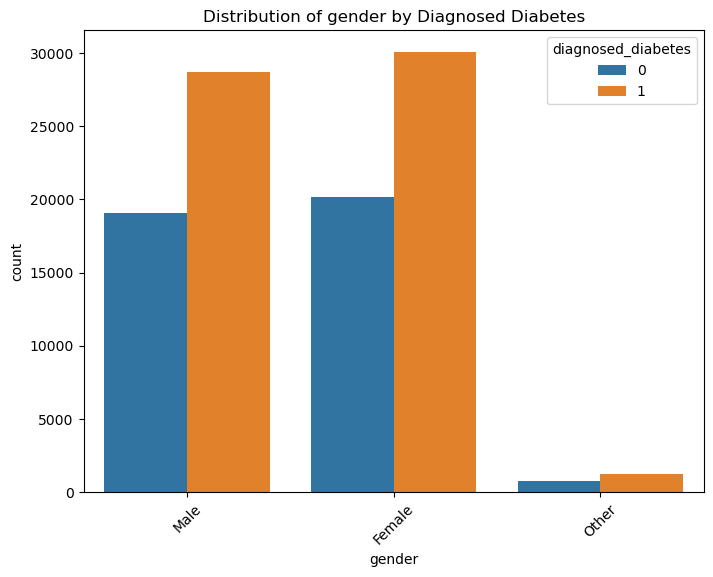

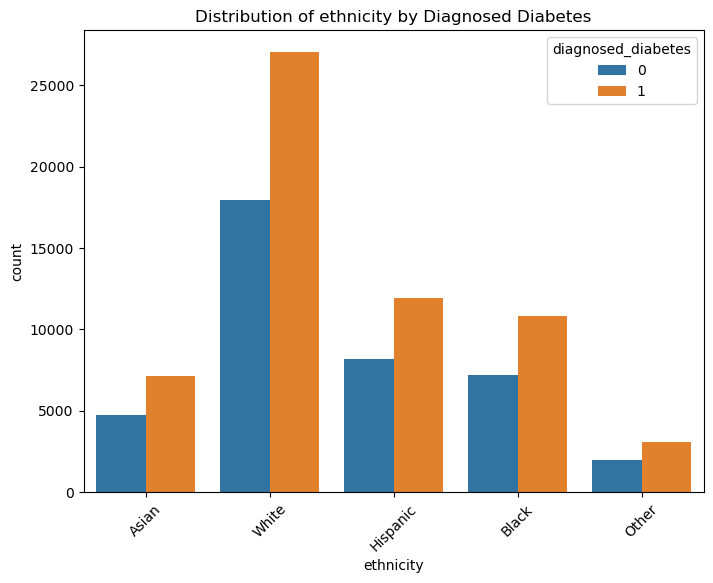

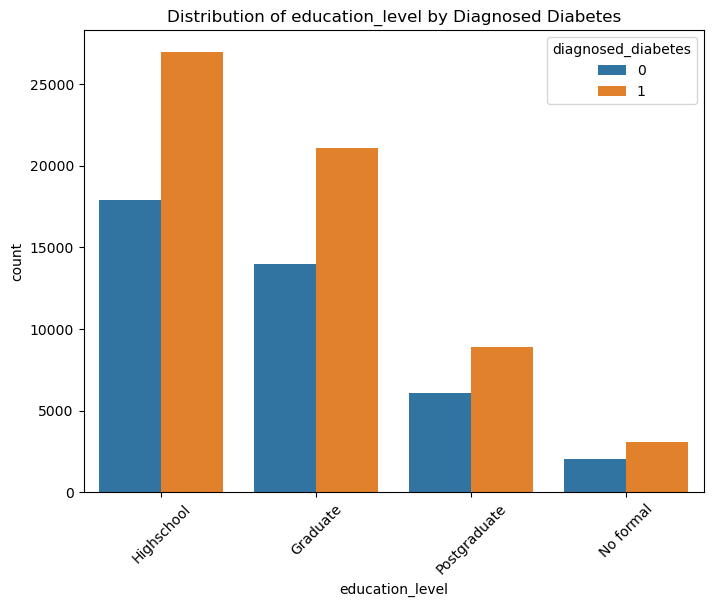

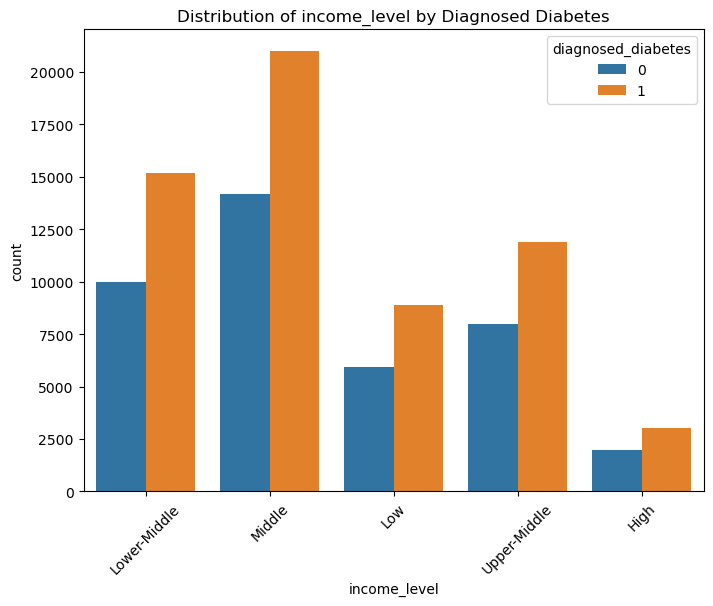

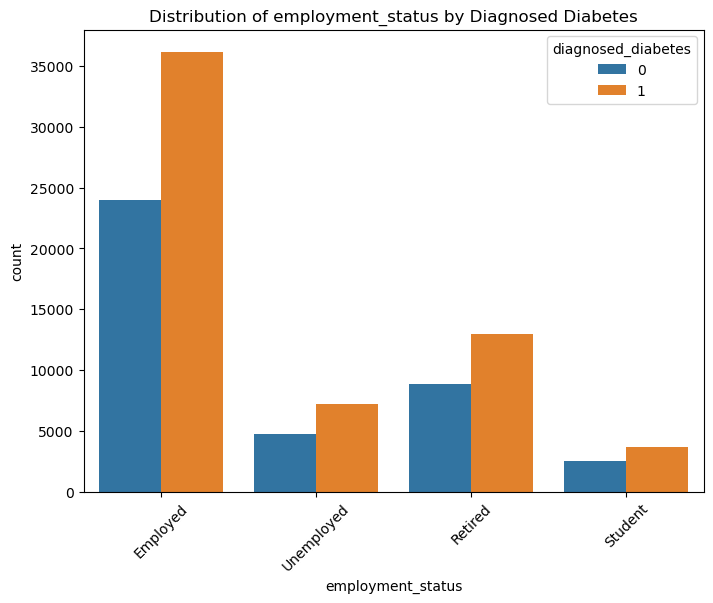

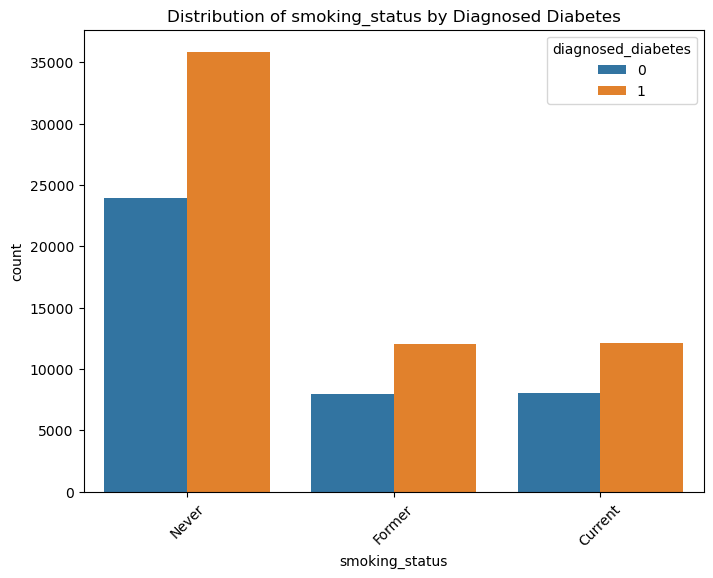

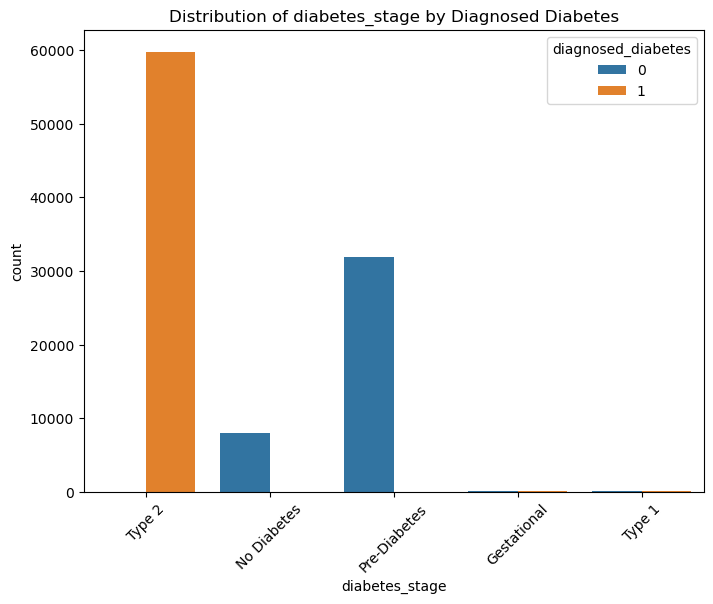

In [34]:
plot_categorical_analysis(df)

In [35]:
df["diagnosed_diabetes"].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

It looks like each categorical group in our dataset has a roughly 60/40 likelihood of having diabetes, with that ratio being slightly lower for students.

Now that we have analyzed the data, we can consider changing some data types to make it easier to work with.

In [36]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [37]:
df.dtypes

age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

In [38]:
for col in df.select_dtypes("number").columns:
    print(f"{col} -> min: {df[col].min()}, max: {df[col].max()}")

age -> min: 18, max: 90
alcohol_consumption_per_week -> min: 0, max: 10
physical_activity_minutes_per_week -> min: 0, max: 833
diet_score -> min: 0.0, max: 10.0
sleep_hours_per_day -> min: 3.0, max: 10.0
screen_time_hours_per_day -> min: 0.5, max: 16.8
family_history_diabetes -> min: 0, max: 1
hypertension_history -> min: 0, max: 1
cardiovascular_history -> min: 0, max: 1
bmi -> min: 15.0, max: 39.2
waist_to_hip_ratio -> min: 0.67, max: 1.06
systolic_bp -> min: 90, max: 179
diastolic_bp -> min: 50, max: 110
heart_rate -> min: 40, max: 105
cholesterol_total -> min: 100, max: 318
hdl_cholesterol -> min: 20, max: 98
ldl_cholesterol -> min: 50, max: 263
triglycerides -> min: 30, max: 344
glucose_fasting -> min: 60, max: 172
glucose_postprandial -> min: 70, max: 287
insulin_level -> min: 2.0, max: 32.22
hba1c -> min: 4.0, max: 9.8
diabetes_risk_score -> min: 2.7, max: 67.2
diagnosed_diabetes -> min: 0, max: 1


It is clear that the integer values can be turned into int8 or int16 data types. Now let us check if we can transform the float values to float32 or float16 without losing much data.

In [39]:
def decimal_places(x):
    try:
        s = str(x).rstrip('0').rstrip('.')  # remove trailing zeros and dot
        if '.' in s:
            return len(s.split('.')[1])
        else:
            return 0
    except:
        return 0

for col in df.select_dtypes("number").columns:
    max_decimals = df[col].apply(decimal_places).max()
    print(f"Max number of decimal places in '{col}':", max_decimals)

Max number of decimal places in 'age': 0
Max number of decimal places in 'alcohol_consumption_per_week': 0
Max number of decimal places in 'physical_activity_minutes_per_week': 0
Max number of decimal places in 'diet_score': 1
Max number of decimal places in 'sleep_hours_per_day': 1
Max number of decimal places in 'screen_time_hours_per_day': 1
Max number of decimal places in 'family_history_diabetes': 0
Max number of decimal places in 'hypertension_history': 0
Max number of decimal places in 'cardiovascular_history': 0
Max number of decimal places in 'bmi': 1
Max number of decimal places in 'waist_to_hip_ratio': 2
Max number of decimal places in 'systolic_bp': 0
Max number of decimal places in 'diastolic_bp': 0
Max number of decimal places in 'heart_rate': 0
Max number of decimal places in 'cholesterol_total': 0
Max number of decimal places in 'hdl_cholesterol': 0
Max number of decimal places in 'ldl_cholesterol': 0
Max number of decimal places in 'triglycerides': 0
Max number of deci

Values have ≤2 decimals and range well below 50,000, so we could hypothetically use float16 instead of float64. However, float16 often causes some issues, so float 32 will be used instead. Object types will be changed to category for clarity. Given that this dataset will not be updated, only the current max and min values will be considered when it comes to int type conversion.

In [40]:
df["age"] = df["age"].astype("int8")
df["alcohol_consumption_per_week"] = df["alcohol_consumption_per_week"].astype("int8")
df["physical_activity_minutes_per_week"] = df["physical_activity_minutes_per_week"].astype("int16")
df["diet_score"] = df["diet_score"].astype("float32")
df["sleep_hours_per_day"] = df["sleep_hours_per_day"].astype("float32")
df["screen_time_hours_per_day"] = df["screen_time_hours_per_day"].astype("float32")
df["family_history_diabetes"] = df["family_history_diabetes"].astype("int8")
df["hypertension_history"] = df["hypertension_history"].astype("int8")
df["cardiovascular_history"] = df["cardiovascular_history"].astype("int8")
df["bmi"] = df["bmi"].astype("float32")
df["waist_to_hip_ratio"] = df["waist_to_hip_ratio"].astype("float32")
df["systolic_bp"] = df["systolic_bp"].astype("int16")
df["diastolic_bp"] = df["diastolic_bp"].astype("int8")
df["heart_rate"] = df["heart_rate"].astype("int8")
df["cholesterol_total"] = df["cholesterol_total"].astype("int16")
df["hdl_cholesterol"] = df["hdl_cholesterol"].astype("int8")
df["ldl_cholesterol"] = df["ldl_cholesterol"].astype("int16")
df["triglycerides"] = df["triglycerides"].astype("int16")
df["glucose_fasting"] = df["glucose_fasting"].astype("int16")
df["glucose_postprandial"] = df["glucose_postprandial"].astype("int16")
df["insulin_level"] = df["insulin_level"].astype("float32")
df["hba1c"] = df["hba1c"].astype("float32")
df["diabetes_risk_score"] = df["diabetes_risk_score"].astype("float32")
df["diagnosed_diabetes"] = df["diagnosed_diabetes"].astype("int8")

for col in df.select_dtypes("object").columns:
    df[col] = df[col].astype("category")

In [41]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int8    
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int8    
 8   physical_activity_minutes_per_week  100000 non-null  int16   
 9   diet_score                          100000 non-null  float32 
 10  sleep_hours_per_day                 100000 non-null  float32 
 11  screen_time_ho

We have successfuly reduced the memory usage from 55.8 MB to 5.9 MB without losing or corrupting any of our data. We will now save it as a parquet file.

In [42]:
df.to_parquet("../diabetes_dataset.parquet")

This dataset is now ready for data preparation.